In [31]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")


In [32]:
# load the dataset
df = pd.read_csv('FODS-A2.csv')
df.head()


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,21.20,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.73,19.200000,39.363333,...,29.230000,9.85,756.183333,41.833333,4.833333,40.0,-2.67,42.017180,42.017180,290
1,21.79,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.90,20.033333,47.290000,...,40.326667,6.90,754.000000,75.000000,4.000000,40.0,2.80,24.624380,24.624380,50
2,22.39,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.26,19.390000,48.090000,...,42.060000,10.10,756.433333,68.000000,5.833333,40.0,4.45,3.731260,3.731260,260
3,24.00,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.20,21.033333,40.626667,...,35.500000,19.10,760.000000,31.000000,4.000000,40.0,1.50,1.058826,1.058826,50
4,20.05,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.40,18.200000,43.560000,...,38.863333,0.10,754.600000,99.000000,1.000000,32.0,-0.10,39.248108,39.248108,30


In [33]:
df[df.isnull().any(axis=1)]# any missing values in row
X=df.iloc[:,0:26]
y=df.iloc[:,-1]
#min max normalize
X_max=X.max()
X_min=X.min()
X=(X-X_min)/(X_max-X_min)
y_max=y.max()
y_min=y.min()
y=(y-y_min)/(y_max-y_min)


In [34]:
order = list(range(len(y)))

shuffle = random.sample(order, int(len(order) * 0.8))

rem = [i for i in order if i not in shuffle]


In [35]:
# train test split
X_train = X.iloc[shuffle,:]
y_train = y.iloc[shuffle]
X_test = X.iloc[rem,:]
y_test = y.iloc[rem]


In [36]:
rmse_train=[]
rmse_test=[]
def forward_feature_selection():
    # forward feature selection
    selected = []
    remaining = list(X_train.columns)
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            scores_with_candidates.append(( candidate))
        selected.append(scores_with_candidates)
    return selected

In [37]:
def pearson_correlation(X_train,y_train):
    # pearson correlation
    mean_x=np.mean(X_train)
    mean_y=np.mean(y_train)
    numerator=(np.dot((X_train-mean_x).T,(y_train-mean_y)))
    numerator=numerator[0]
    denominator=np.sqrt(np.sum((X_train-mean_x)**2)*np.sum((y_train-mean_y)**2))
    ans = numerator/denominator
    # convert np to float
    return ans

In [38]:
def find_theta(x, y):
    theta = np.dot(np.linalg.pinv(np.dot(x.T, x)), np.dot(x.T, y))
    return theta

In [39]:
def predict(x, theta):
    pred = np.dot(x, theta)
    return pred

In [40]:
def linear_regression(train_x,train_y,test_x,test_y):
    theta = find_theta(train_x,train_y)
    y_pred_train = predict(train_x, theta)
    # calculate rmse train
    y_pred_train = np.array(y_pred_train)
    train_y = np.array(train_y)
    rmse_train = np.sqrt(np.sum((y_pred_train - train_y)**2)/len(train_y))

    # calculate rmse test
    y_pred_test = predict(test_x, theta)
    y_pred_test = np.array(y_pred_test)
    rmse_test = np.sqrt(np.sum((y_pred_test - test_y)**2)/len(train_y))

    return rmse_train,rmse_test*2

In [41]:
selected=[]
remaining = list(X_train.columns)
rmse_test = []
rmse_train = []
while remaining:
    sel=[]
    for candidate in remaining:
        # remove that feature from the dataset which have min correlation
        corr=pearson_correlation(X_train[selected+[candidate]],y_train)
        corr = corr.tolist()
        sel.append([abs(corr[-1]),selected+[candidate]])
    # print(sel)
    # sel=sorted(sel, key=lambda sel: sel[1])
    sel.sort()
    best=sel.pop()
    # best=sel[-1]
    # print(best[-1][0])
    selected.append(best[-1][-1])
    print(selected)
    train,test=linear_regression(X_train[selected],y_train,X_test[selected],y_test)
    rmse_train.append(train)
    rmse_test.append(test)
    print("RMSE train: ",train)
    print("RMSE test: ",test)
    print('\n')
    # print(selected)
    remaining.remove(best[-1][-1])
    # print(remaining)

['RH_out']
RMSE train:  0.12744293807079896
RMSE test:  0.12377512398095444


['RH_out', 'RH_2']
RMSE train:  0.12280256178320602
RMSE test:  0.12067375920442275


['RH_out', 'RH_2', 'RH_1']
RMSE train:  0.12152331174996302
RMSE test:  0.12057399109008163


['RH_out', 'RH_2', 'RH_1', 'RH_5']
RMSE train:  0.12125058320723521
RMSE test:  0.12027354159242656


['RH_out', 'RH_2', 'RH_1', 'RH_5', 'RH_3']
RMSE train:  0.12117263345076451
RMSE test:  0.1202532686321593


['RH_out', 'RH_2', 'RH_1', 'RH_5', 'RH_3', 'T2']
RMSE train:  0.12019799715607825
RMSE test:  0.11953770913826667


['RH_out', 'RH_2', 'RH_1', 'RH_5', 'RH_3', 'T2', 'T3']
RMSE train:  0.12004159182079739
RMSE test:  0.1193459051818575


['RH_out', 'RH_2', 'RH_1', 'RH_5', 'RH_3', 'T2', 'T3', 'Press_mm_hg']
RMSE train:  0.11861842075783625
RMSE test:  0.11771256507916784


['RH_out', 'RH_2', 'RH_1', 'RH_5', 'RH_3', 'T2', 'T3', 'Press_mm_hg', 'T1']
RMSE train:  0.11860495887610788
RMSE test:  0.11772187755289303


['RH_out', 'RH

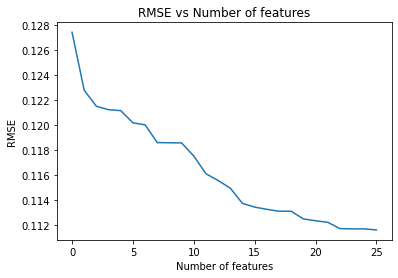

In [42]:
# plot rmse train
plt.plot(rmse_train)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of features')
plt.show()


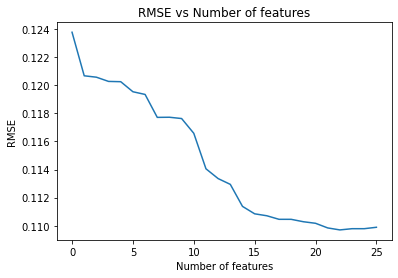

In [43]:
# plot rmse trst
plt.plot(rmse_test)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of features')
plt.show()


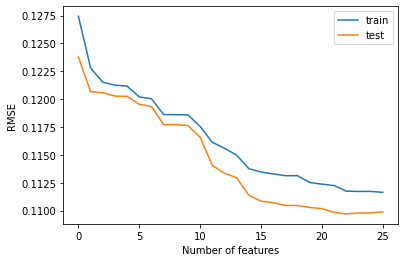

In [44]:
# plot
plt.plot(rmse_train, label='train')
plt.plot(rmse_test, label='test')
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.legend()
plt.show()